- ## Name: `Uday Bhardwaj`
- ## Id: `12241910`
- ## Topic: `DS201-Assignment 2`

---
## __Imports__

In [1]:
import pandas as pd
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## __Functions__

### _Poisson Distribution_ 

In [2]:
# -----------------------------------------------  GENERAL FUNCTIONS  ------------------------------------------------------------
# MEAN
def arr_mean(arr:np.array)->float:
  """_Summary_
    This returns the mean of all the values which are present in the numpy array.
  Args:
    arr (np.array): This is an array containing the values for which mean has to be taken out.

  Returns:
    float: A floating integer is returned which is the mean of the values provided in the numpy array.
  """

  sum:int =0; sz:int = len(arr)  
  
  for i in range(sz):
    sum += arr[i]
    
  return sum/sz


# VARIANCE
def arr_variance( arr:np.array , mean:float )->float:
  """_Summary_
    This returns the variance of all the values which are present in the numpy array.
  Args:
    arr (np.array): This is an array containing the values for which mean has to be taken out.
    mean (float): This is the mean of the values present in the array.
  Returns:
    float: A floating integer is returned which is the variance of the values provided in the numpy array.
  """

  sum:int = 0; sz=len(arr)
  
  for i in range(sz):
    sum += (arr[i]-mean)**2
  
  return (sum)/sz


# -------------------------------------------------------  UNIVARIATE  -----------------------------------------------------------------
# Function which follows altered cdf of Poisson distribution
def changed_Poisson(X:int, lamda:int)->float:
	"""This is a function which returns the poission distribution."""

	f_x = ( (lamda**X)/mt.factorial(X) )
	return f_x

# Function which follows the altered cdf of Poisson distribution
def Poisson_cdf( lim:int , LAMDA:int )->np.array:
  """_summary_

  Args:
      lim (int): This is the limit upto which the numpy array is to be made

  Returns:
      np.array: This is the numpy array which has the index number as the realisation of the random variable and the value in the array as the cdf upto that value.

  It returns an array which contains the cdf value for the (index + 1) range.
  """

  arr =[ 0 ]
  for i in range(1,lim,1):
    arr.append( arr[i-1] + changed_Poisson(i,LAMDA) )
  cdf=np.array(arr)
  
  return cdf

# Function which works as the inverse for the Poisson distribution
def Poisson_value( cdf:np.array, prob:float ,lamda:int )->int:
  """_summary_

  Args:
    cdf (np.array): This is the cdf array for a particular distribution.
    prob (float): This is an specific probability value which is in the range of 0 to 1. 

  Returns:
    int: This is the realisation of the random variable.
  """

  sz: int =len(cdf)
  for i in range(sz):
    if( prob/mt.exp(0-lamda) < cdf[i]):
      return i
    
  return 0

# Function which gives randomly generated numbers which follow gaussian distribution
def ITS_poisson( num_samples:int, prestored_samples:int, lamda:int )->np.array:
  """_Summary_
  
  Args:
    num_samples (int): This is the toal number of samples taken for the transformation from uniform to gaussian function.
    prestored_samples (int): This is the total number of prestored samples taken.
    lamda (int): This is the lamda taken for the gaussian distribution.

  Returns:
    np.array: This is the array which contains the transformed uniform random number which now follow normal/gaussian distribution 
  """
  
  CAL= Poisson_cdf( prestored_samples ,lamda )
  
  # Generating uniform random numbers
  dp: np.array = np.random.uniform(0, 1, num_samples)
  dataset:np.array = np.array( [ Poisson_value(CAL,i,lamda) for i in dp ] )
  
  return dataset

### _Gaussian Distribution_

In [3]:
def ITS_gaussian(num_samples, mean:tuple, Covariance:list  ):
  """_Summary_
    This returns an array with random numbers which follow the standard normal distribution.
    
    Here, Inverse transform sampling uses the Box-muller transformation to convert the uniform random samples to the standard normal distribution. The link for the definition and implementation of the Box-muller transformation has been given in the refrences.

  Args:
      samples (int): This is the number which tells about how many samples do we need 

  Returns:
      tuple: This returns a tuple of bivariate tuples which give gaussian distribution following values. 
  """
  
  var=( Covariance[0][0], Covariance[1][1] )
  corr=Covariance[0][1]/(np.sqrt(Covariance[0][0]*Covariance[1][1]))
  
  u1 =  np.random.uniform(0,1,num_samples)
  u2 = np.random.uniform(0,1,num_samples )

  # Generating two bivariate standard normal disibutions
  z1 = np.sqrt( -2  * np.log( u1 ) ) * np.cos(2 * np.pi * u2)
  z2 =  np.sqrt(-2 * np.log(u1)) *  np.sin(2 * np.pi * u2)
  
  # Generate correlated variables
  x1 = mean[0] + np.sqrt( var[0] ) * z1
  x2 = mean[1] + Covariance[0][1] /np.sqrt(var[0])*z1 + np.sqrt(var[1]-Covariance[0][1]**2 / var[0])*z2

  # Creating the Dataset
  data:np.array=[]
  for i in range( len(x1) ):
    data =data+[(x1[i],x2[i])]

  return data

---
# __Question 1__

## __Introduction__

- #### The Question consisted the following parts:
  -  #### `Q`: Generate a dataset representing the number of customer arrivals per hour in a store, assuming a Poisson distribution with a mean arrival rate of 5. 
      #### Use Python to create a histogram to visualize the distribution. Calculate the mean and variance of the generated dataset and explain how they relate to the parameters of the Poisson distribution.
  - #### `A`: Here the mean arrival rate is the mean for the distribution and also the _lamda_ for the _Poisson distribution_. Using this, we calculate the mean and variance of the distribution.
  ---
  - #### `Q`: Generate a bivariate dataset with two features (e.g., height and weight) assuming a multivariate Gaussian distribution with given means μ1 = 65, μ2 = 150 and covariance matrix Σ [[25, 10], [10, 36]]. 
      #### Visualize the data using a scatter plot in Python. Discuss the patterns in the plot and how they correspond to the parameters of the multivariate Gaussian distribution.
  - #### `A`: Here, the Covariance matrix can be expressed in terms of variance and correlation for the height and weight. After this we can apply Box-Muller Technique.
  ---
  - #### `Q`: Generate a dataset for a univariate scenario (e.g., sales per day) and a bivariate scenario (e.g., temperature and sales) using both Poisson and multivariate Gaussian distributions. Create visualizations for each dataset using appropriate plots for each distribution (e.g., histogram for Poisson, scatter plot for multivariate Gaussian). Compare and contrast the visualizations, explaining how the characteristics of each distribution are reflected in the plots
  - #### `A`: Here we take random values for mean and variance ensuring the negative value criteria for sales.

## __A__

### __Methodology__

- #### The main idea used here is to get the cdf of random variable for a large number of realisations of the random variable `X` which follows the Poisson distibution.

- #### The Poisson distribution can be represented by the pmf as:
#### $$  P(x,\lambda)\;=\;\frac{\lambda^{x}\;e^{-\lambda}}{x!}  $$

- #### However for the ease of calculation, we have altered the pmf slightly by taking the it as:
#### $$  P(x,\lambda)\;=\;\frac{\lambda^{x}}{x!}  $$

- #### The extra `exponential term` has been added while taking the probability as the input.

- #### In the code mentioned below, the functions pertaining to each task has been documented in a well-defined manner.

### __Code__

#### _Generating the Dataset_

In [4]:
"""
Initially the range of the values was limited to 34 due to the huge computation overheads and datatype overflow, however changing the way we evaluate the cdf can increase the limit of the function.
"""

# Earlier the Upper range of the limit is 171
prestored_samples_1a =2000
LAMDA_1a= 5
size_unif_1a=1200

# Generating the cdf of the gaussian distribution
CDF_1a =  Poisson_cdf( prestored_samples_1a, LAMDA_1a)* mt.exp(0-LAMDA_1a)

# Generating the dataset
dataset_Poisson_1a=ITS_poisson( size_unif_1a, prestored_samples_1a, LAMDA_1a)

#### _Displaying the mean and variance_

In [5]:
mean_1a:float =arr_mean(dataset_Poisson_1a)
var_1a:float =arr_variance( dataset_Poisson_1a , mean_1a )

# Displaying the necessaary information
print(f"The mean of the dataset is {mean_1a}.",end="\n\n")
print(f"The variance of the dataset is {var_1a}.",end="\n\n")

The mean of the dataset is 5.035833333333334.

The variance of the dataset is 4.957882638888864.



#### _Visualization_

In [1]:
# Changing the bin-size
BIN_SIZE = [20, 40, 60, 80 ]

plt.figure( figsize=(14,14)  ); #plt.rcParams['figure.autolayout']=True
for i in range( len( BIN_SIZE ) ):

  # Making the condition for the plots and changing their coordinated by the use of subplot function
  plt.style.use( 'seaborn-v0_8' )
  plt.subplot(2,2,i+1)
  plt.title(f"Bin size={BIN_SIZE[i]}")
  plt.xlabel('Realisation');  plt.ylabel('Frequency')


  # Showing the bar plot
  plt.hist(dataset_Poisson_1a, bins=BIN_SIZE[i], linewidth=1, edgecolor="white")


NameError: name 'plt' is not defined

### _Discussion_

- #### The Mean and Variance from the dataset which we have generated from the has come out to be approximately the same as the expectation of the distribution and the variance of the Poisson distribution.
- #### This can also be visualized through the bar plot which is made. Most number of values are near to the realisation of mean which is 5.

### _Results_

- #### It can be inferred from here that if we generate random numbers as a dataset from a distribution then the data generated follows that particular distribution.
- #### Additionally, the visualisation for the dataset will also show similar mean and variance to the distribution choosen. 

## __B__

### __Methodology__

- #### The main idea behind the method used is to generate a dataset from uniform distribution which follows Gaussian distribution.

- #### This is done with the help of Box-Muller Technique which is defined as follows:
  - #### It can be defined as a way to inverse sampling. However, it generates numbers which follow _Standard Normal Distribution_.
  - #### The formulas used for the Box-Muller transform are:
    $$ Z_1 = R\;\cos{(\theta)}\;=\;\sqrt{-2\ln{U_1}} \cos{2\pi U_2}  $$
    $$ Z_2 = R\;\sin{(\theta)}\;=\;\sqrt{-2\ln{U_2}} \sin{2\pi U_1}  $$
  - #### Z1 and Z2, generated here, follow standard normal distributions.
  - #### The derivation for the Box-Muller technique involves the use of geometry and Pythogoras theorem.

- #### Since we have standard normal distributions below which are independent of each other, We convert them to variables which are dependent on each other.
  $$  X = \mu_1 + \sqrt{ \sigma_1 }\;\;z_1  $$
  $$  Y = \mu_2 + p\;\sigma_1\;z_1 +z_2\;\sigma_2\;\sqrt{1-p^2}  $$

- #### The second variable is transformed such that its dependency on the other variable is taken into account with the help of _Correlation_ and _Overall Covariance_.

- #### Finally, the generated dataset is visualized with the help of _Scatterplot_.

### __Code__

#### Generating Dataset

In [7]:
# Number of samples
num=1000
Hmean=65; Wmean=150
Hvar=25; Wvar=36
corr=1/3
Cov=10

DATASET_1B=ITS_gaussian(num_samples=num, mean=( Hmean, Wmean), Covariance=[[25,10],[10,36]])

x1:np.array=[]; x2:np.array=[]
for elm in DATASET_1B:
  x1=x1+[elm[0]]
  x2=x2+[elm[1]]

#### _Displaying the mean and variance_

In [8]:
mean_1b_height:float =arr_mean(x1)
var_1b_height:float =arr_variance( x1 , mean_1b_height )

mean_1b_weight:float =arr_mean(x2)
var_1b_weight:float =arr_variance( x2 , mean_1b_weight )

# Displaying the necessaary information
print(f"The means of the dataset for height and weight are {mean_1b_height} and {mean_1b_weight} respectively.",end="\n\n")
print(f"The variance of the dataset for height and weight are {var_1b_height} and {var_1b_weight} respectively.",end="\n\n")

The means of the dataset for height and weight are 64.90316971547152 and 149.95126161998013 respectively.

The variance of the dataset for height and weight are 25.053152688374126 and 35.124915060088654 respectively.



#### __Visualisation__

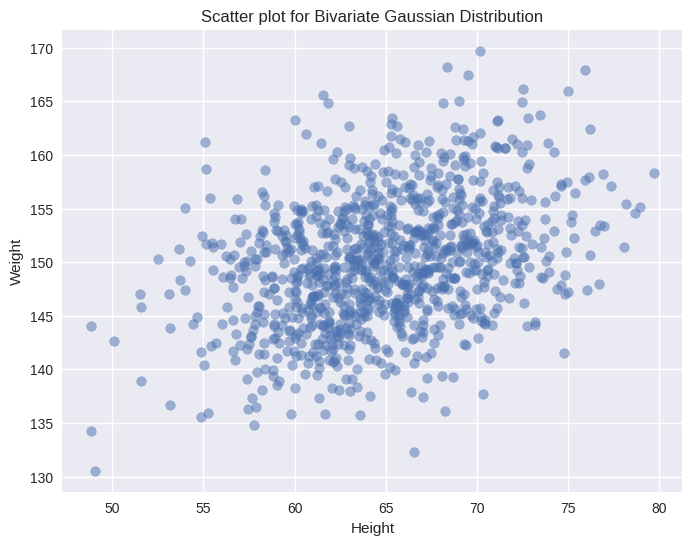

In [9]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, alpha=0.5)

plt.title('Scatter plot for Bivariate Gaussian Distribution')
plt.xlabel('Height'); plt.ylabel('Weight')
plt.grid(True)
plt.show()

### __Discussion__

- #### Hence, Box-muller technique can  be used to get a dataset containing points which follow normal distribution.

- #### It can be seen that the maximum density of points in the plot is near the mean values of the two variables.

- #### We can also see that the density decreases as we go farther from the means of two distribution. This is in conjunction with the normal principle.

### __Results__

- ### It can be inferred from here that the most number of points from the _Bivariate Normal Distribution_ come from areas which are near the mean values. 

## __C__

### __Methodology__

- #### The same method is used to get a dataset following Poisson and a bivariate normal distribution as in part _A_ and _B_.

- #### The values for the mean and variance can be changed the impact can be seen through the visualisation.


### __Code__

#### _Poisson_: _Generating the Dataset_

In [10]:
"""
Initially the range of the values was limited to 34 due to the huge computation overheads and datatype overflow, however changing the way we evaluate the cdf can increase the limit of the function.
"""

# Earlier the Upper range of the limit is 171
prestored_samples_1c = 2000
LAMDA_1c= 10
size_unif_1c= 1200

# Generating the cdf of the gaussian distribution
CDF_1c =  Poisson_cdf( prestored_samples_1c, LAMDA_1c)* mt.exp(0-LAMDA_1c)

# Generating the dataset
dataset_Poisson_1c=ITS_poisson( num_samples=size_unif_1c, prestored_samples=prestored_samples_1c, lamda=LAMDA_1c)

#### _Displaying the mean and variance_

In [11]:
mean_1c:float =arr_mean(dataset_Poisson_1c)
var_1c:float =arr_variance( dataset_Poisson_1c , mean_1c )

# Displaying the necessaary information
print(f"The mean of the dataset is {mean_1c}.",end="\n\n")
print(f"The variance of the dataset is {var_1c}.",end="\n\n")

The mean of the dataset is 10.013333333333334.

The variance of the dataset is 9.948155555555672.



#### _Gaussian_: _Generating Dataset_

In [12]:
# Number of samples
num=1000
Temp=30; Sales=100
var_temp=16; var_sales=25
corr_3c=1/4
Cov_3c=5

dataset_Gaussian_1c=ITS_gaussian(num_samples=num, mean=( Temp, Sales), Covariance=[[var_temp,Cov_3c],[Cov_3c,var_sales]])

x1:np.array=[]; x2:np.array=[]
for elm in dataset_Gaussian_1c:
  x1=x1+[elm[0]]
  x2=x2+[elm[1]]

#### _Displaying the mean and variance_

In [13]:
mean_1c_temp:float =arr_mean(x1)
var_1c_temp:float =arr_variance( x1 , mean_1c_temp )

mean_1c_sales:float =arr_mean(x2)
var_1c_sales:float =arr_variance( x2 , mean_1c_sales )

# Displaying the necessaary information
print(f"The means of the dataset for temperature and sales are {mean_1c_temp} and {mean_1c_sales} respectively.",end="\n\n")
print(f"The variance of the dataset for temperature and sales are {var_1c_temp} and {var_1c_sales} respectively.",end="\n\n")

The means of the dataset for temperature and sales are 30.059167768697236 and 100.23946423607487 respectively.

The variance of the dataset for temperature and sales are 15.219045896461083 and 25.914514930676667 respectively.



#### _Visualization_

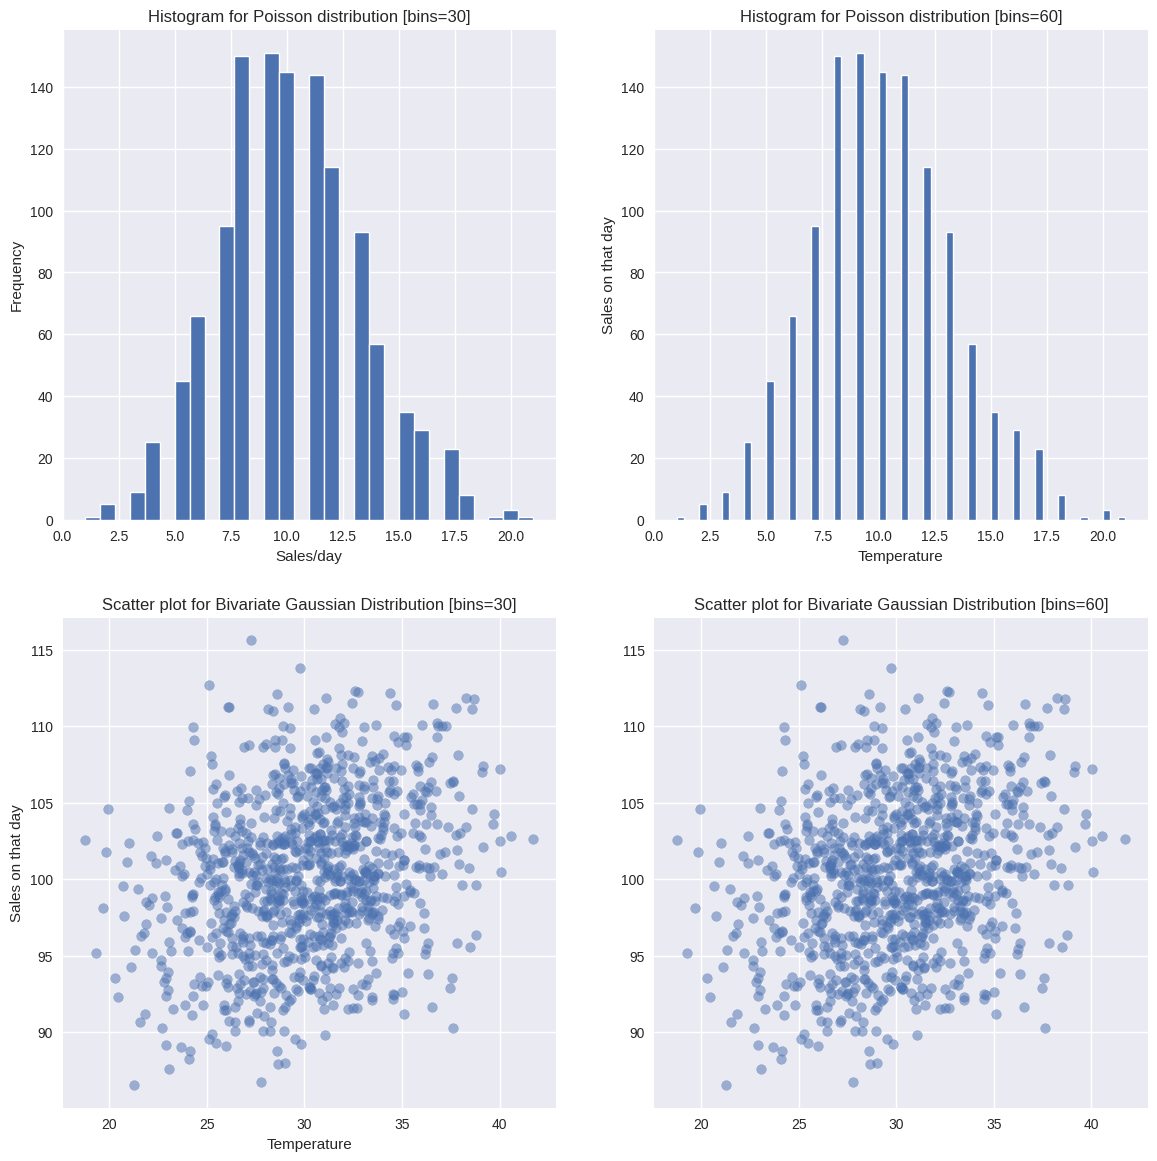

In [14]:
# Changing the bin-size
BIN_SIZE = [30, 60 ]

plt.figure( figsize=(14,14)  ); #plt.rcParams['figure.autolayout']=True
for i in range( len( BIN_SIZE ) ):

  # Making the condition for the plots and changing their coordinated by the use of subplot function
  plt.style.use( 'seaborn-v0_8' )
  plt.subplot(2,2,i+1)
  plt.xlabel('Sales/day');  plt.ylabel('Frequency')


  # Showing the bar plot
  plt.hist(dataset_Poisson_1c, bins=BIN_SIZE[i], linewidth=1, edgecolor="white")
  plt.title(f"Histogram for Poisson distribution [bins={BIN_SIZE[i]}]")

for i in range( len(BIN_SIZE) ):
  # Scatter plot
  
  plt.xlabel('Temperature'); plt.ylabel('Sales on that day')
  plt.grid(True)
  plt.subplot(2,2,i+3)
  plt.scatter(x1, x2, alpha=0.5)
  plt.title(f'Scatter plot for Bivariate Gaussian Distribution [bins={BIN_SIZE[i]}]')



### __Discussion__

- #### Through this, we can confirm our earlier hypothesis that the density is highest near the means of the two variables than near other values.

- #### Here, we can also see that the means and variance of the sample generated follow the distribution more and more as we increse the size of the distribution.

### __Results__

- #### Finally, we can say that the impact on the visualisation with respect to changes in number of samples and the realisation of the samples.

## __Conclusion__

- ### From the above question, we can say that the major properties of a dataset depends heavily on the distribution from which data has been taken.

- ### The number of data points can also cause a huge impact on the overall properties of the distribution.

---
# __Question 2__

## __Introduction__

- ### Write a Python code to generate 1000 random numbers from a Poisson distribution with a mean of 3.

- ### Transform the generated Poisson numbers to their squares and create a histogram to visualize the distribution of squared values.

- ### Now, write a Python code to generate 100 pairs of random numbers from a bivariate Gaussian distribution with means μ1 = 2, μ2 = 3 and covariance matrix Σ = [[1, 0.5], [0.5, 2]].
- ### Transform each pair of Gaussian numbers to their squares (both elements of the pair) and create a 3D scatter plot to visualize the distribution of squared values.
- ### Compare the histograms from the Poisson distribution and the scatter plot from the multivariate Gaussian distribution in terms of the shape and spread of the squared values.
- ### Discuss any insights gained from the visualizations and transformations, considering the characteristics of each distribution.

## __A__

### __Methodology__

- #### The main idea used here is similar to the one used in `Q1.(a)` i.e. to get the cdf of random variable for a large number of realisations of the random variable `X` which follows the Poisson distibution.

- #### The Poisson distribution can be represented by the pmf as:
#### $$  P(x,\lambda)\;=\;\frac{\lambda^{x}\;e^{\lambda}}{x!}  $$

- #### However for the ease of calculation, we have altered the pmf slightly by taking the it as:
#### $$  P(x,\lambda)\;=\;\frac{\lambda^{x}}{x!}  $$

- #### The extra `exponential term` has been added while taking the probability as the input.

- #### In the next part, we have transformed the random variable X to get another random variable Y.
#### $$  Y\;=\;X^2  $$

### __Code__

#### _Generating the Dataset_

In [15]:
prestored_samples_2a = 2000
LAMDA_2a= 3
size_unif_2a=1000

# Generating the cdf of the gaussian distribution
CDF_2a =  Poisson_cdf( prestored_samples_2a, LAMDA_2a)* mt.exp(0-LAMDA_2a)

# Generating the dataset
dataset_Poisson_2a=ITS_poisson( size_unif_2a, prestored_samples_2a, LAMDA_2a)

#### _Displaying the mean and variance_

In [16]:
mean_2a:float =arr_mean(dataset_Poisson_2a)
var_2a:float =arr_variance( dataset_Poisson_2a , mean_2a )

# Displaying the necessaary information
print(f"The mean of the dataset is {mean_2a}.",end="\n\n")
print(f"The variance of the dataset is {var_2a}.",end="\n\n")

The mean of the dataset is 2.994.

The variance of the dataset is 3.0839640000000013.



## __B__

### _Transformation_

In [17]:
# Squaring the initial array
dataset_Poisson_2a_square=dataset_Poisson_2a**2

#### _Displaying the mean and variance_

In [18]:
mean_2b:float =arr_mean(dataset_Poisson_2a_square)
var_2b:float =arr_variance( dataset_Poisson_2a_square , mean_2b )

# Displaying the necessaary information
print(f"The mean of the dataset is {mean_2b}.",end="\n\n")
print(f"The variance of the dataset is {var_2b}.",end="\n\n")

The mean of the dataset is 12.048.

The variance of the dataset is 172.5336960000009.



### _Visualization_

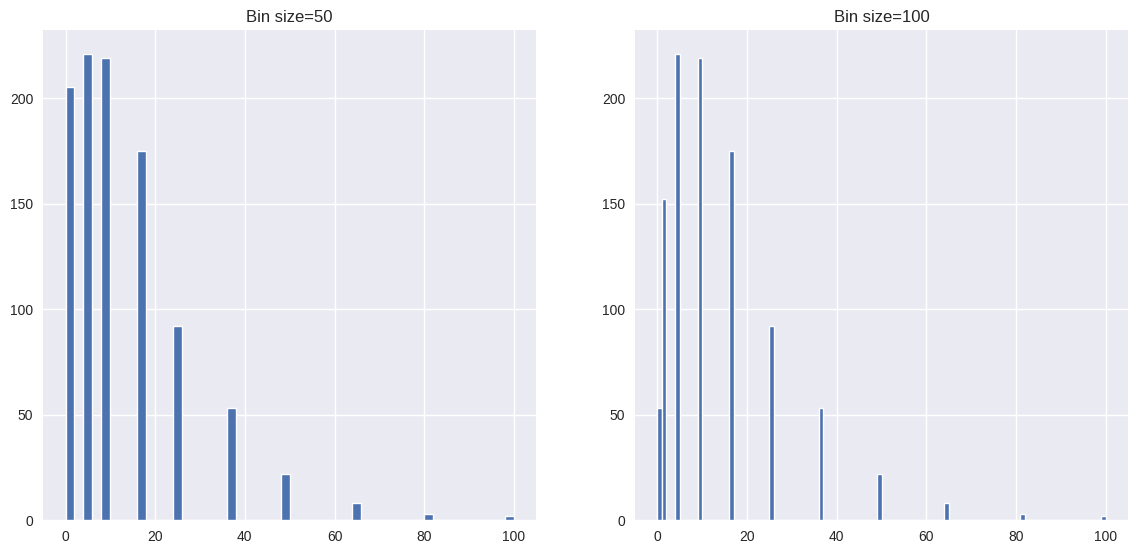

In [19]:
# Changing the bin-size
BIN_SIZE = [ 50, 100 ]

plt.figure( figsize=(14,14)  ); #plt.rcParams['figure.autolayout']=True
for i in range( len( BIN_SIZE ) ):

  # Making the condition for the plots and changing their coordinated by the use of subplot function
  plt.style.use( 'seaborn-v0_8' )
  plt.subplot(2,2,i+1)
  plt.title(f"Bin size={BIN_SIZE[i]}")

  # Showing the bar plot
  plt.hist(dataset_Poisson_2a_square, bins=BIN_SIZE[i], linewidth=1, edgecolor="white")


## __C__

### __Methodology__

- #### The main idea behind the method used is to generate a dataset from uniform distribution which follows Gaussian distribution.

- #### This is done with the help of Box-Muller Technique which is defined as follows:
  - #### It can be defined as a way to inverse sampling. However, it generates numbers which follow _Standard Normal Distribution_.
  - #### The formulas used for the Box-Muller transform are:
    $$ Z_1 = R\;\cos{(\theta)}\;=\;\sqrt{-2\ln{U_1}} \cos{2\pi U_2}  $$
    $$ Z_2 = R\;\sin{(\theta)}\;=\;\sqrt{-2\ln{U_2}} \sin{2\pi U_1}  $$
  - #### Z1 and Z2, generated here, follow standard normal distributions.
  - #### The derivation for the Box-Muller technique involves the use of geometry and Pythogoras theorem.

- #### Since we have standard normal distributions below which are independent of each other, We convert them to variables which are dependent on each other.
  $$  X = \mu_1 + \sqrt{ \sigma_1 }\;\;z_1  $$
  $$  Y = \mu_2 + p\;\sigma_1\;z_1 +z_2\;\sigma_2\;\sqrt{1-p^2}  $$

- #### The second variable is transformed such that its dependency on the other variable is taken into account with the help of _Correlation_ and _Overall Covariance_.

- #### Then, we transform the variable by squaring their values.

- #### Finally, the generated dataset after squaring is visualized with the help of _Scatterplot_.

### __Code__

#### Generating Dataset

In [20]:
# Number of samples
num=10000
P1_mean=2; P2_mean=3
P1_var=1; P2_var=2
corr=0.5/np.sqrt(P1_var*P1_var)
Cov=0.5

DATASET_2C=ITS_gaussian(num_samples=num, mean=( P1_mean, P2_mean), Covariance=[[P1_var,Cov],[Cov,P2_var]])

x1:np.array=[]; x2:np.array=[]
for elm in DATASET_2C:
  x1=x1+[elm[0]]
  x2=x2+[elm[1]]

#### _Displaying the mean and variance_

In [21]:
mean_2c_P1:float =arr_mean(x1)
var_2c_P1:float =arr_variance( x1 , mean_2c_P1 )

mean_2c_P2:float =arr_mean(x2)
var_2c_P2:float =arr_variance( x2 , mean_2c_P2 )

# Displaying the necessaary information
print(f"The means of the dataset for P1 and P2 are {mean_2c_P1} and {mean_2c_P2} respectively.",end="\n\n")
print(f"The variance of the dataset for P1 and P2 are {var_2c_P1} and {var_2c_P2} respectively.",end="\n\n")

The means of the dataset for P1 and P2 are 2.0152719932832737 and 2.9837833567508687 respectively.

The variance of the dataset for P1 and P2 are 1.004495831167571 and 1.9611480840748325 respectively.



## __D__

### _Transformation_

In [22]:
# Transformed Variable
x1_transformed= np.array( [ elm*elm for elm in x1 ] )
x2_transformed= np.array( [ elm*elm for elm in x2 ] )

### _Displaying the mean and variance_

In [23]:
mean_2c_P1_trans:float =arr_mean(x1_transformed)
var_2c_P1_trans:float =arr_variance( x1_transformed , mean_2c_P1_trans )

mean_2c_P2_trans:float =arr_mean(x2_transformed)
var_2c_P2_trans:float =arr_variance( x2_transformed , mean_2c_P2_trans )

# Displaying the necessaary information
print(f"The means of the dataset for P1 Squared and P2 Squared are {mean_2c_P1_trans} and {mean_2c_P2_trans} respectively.",end="\n\n")
print(f"The variance of the dataset for P1 Squared and P2 Squared are {var_2c_P1_trans} and {var_2c_P2_trans} respectively.",end="\n\n")

The means of the dataset for P1 Squared and P2 Squared are 5.06581703807951 and 10.86411120409829 respectively.

The variance of the dataset for P1 Squared and P2 Squared are 18.59683854256796 and 78.09000517892832 respectively.



### _Visualisation_

Text(0, 0.5, 'P2')

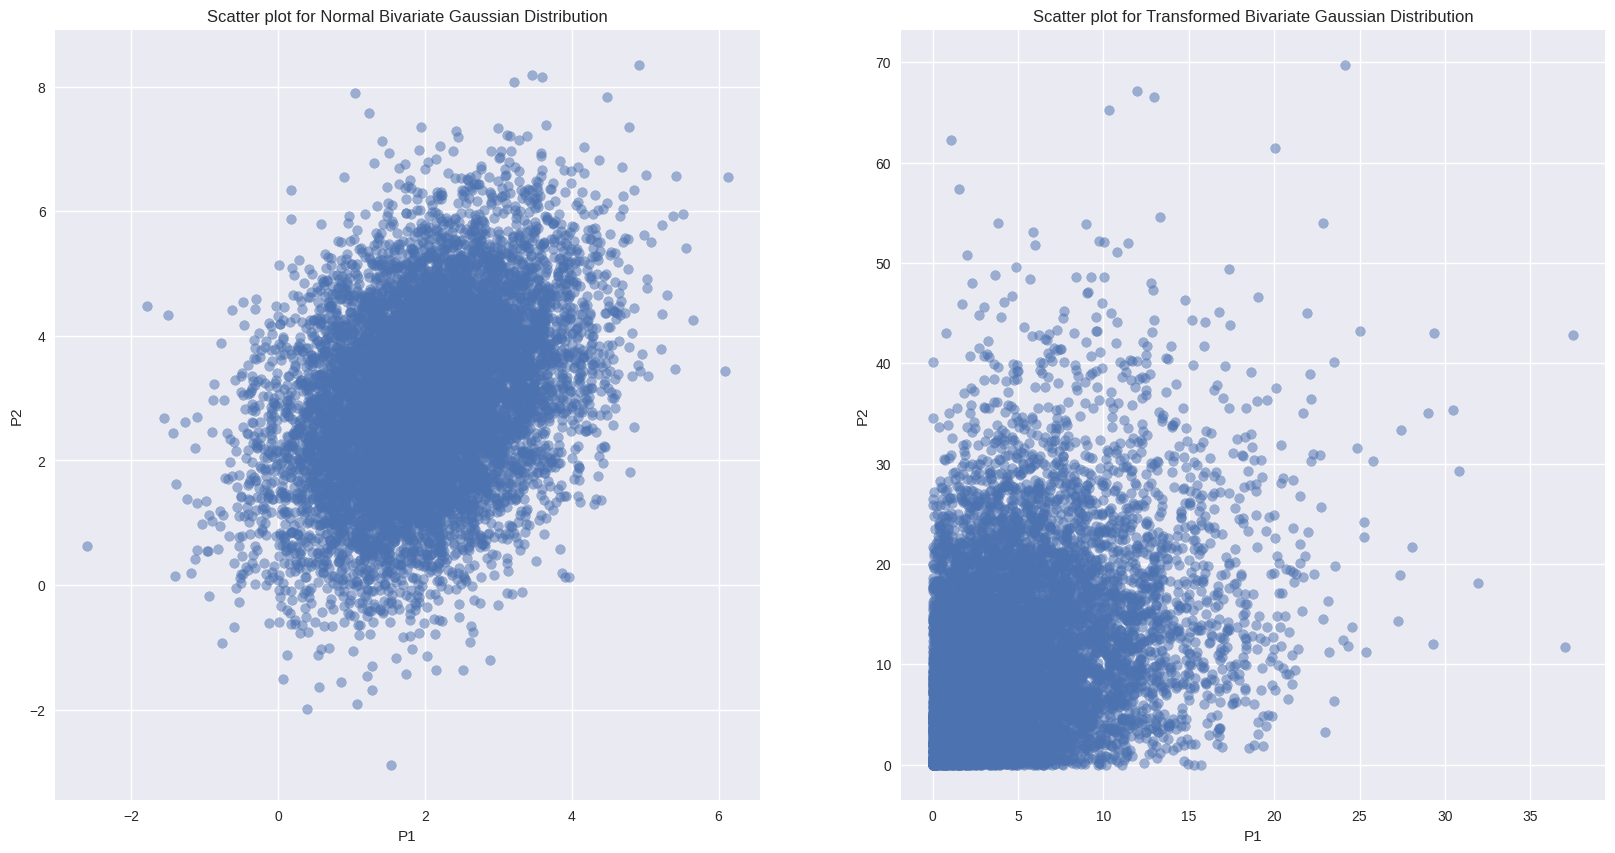

In [24]:
  # Scatter plot
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.scatter(x1, x2, alpha=0.5)
plt.title('Scatter plot for Normal Bivariate Gaussian Distribution')
plt.xlabel('P1'); plt.ylabel('P2')

plt.subplot(1,2,2)
plt.scatter(x1_transformed, x2_transformed, alpha=0.5)  
plt.title('Scatter plot for Transformed Bivariate Gaussian Distribution')
plt.xlabel('P1'); plt.ylabel('P2')

In [25]:
# zr=np.ones(len(x1_transformed))
# 
# ax=plt.axes(projection="3d")
# ax.scatter3D(x1_transformed, x2_transformed , zr)
# plt.show()

## __E__

- #### The Histogram which we obtained from the Poisson distribution shows the maximum values nearly equal to 3 and 9 respectively which shows that by squaring values which follow Poisson distribution, we get a similar -to poisson distribution whose mean is lies around the square of previous mean.

- #### We can also see here that the distribution has some differences which can be seen said due to the size of the samples.

- #### The spread also increases when we sqaure the values which follow the Poisson distribution.

- #### The similar trend can be seen in the case of Scatterplot obtained from the Normal distribution.

## __F__

- #### The major insight which can be gained from the above analysis is that the size of the sample matters a lot when generating numbers which follow a specific distribution.

- #### Another important point to note here is that the mean and variance of the sample see a similar trend in their distribution and if we apply a transformation on the values, this can also be seen in the visualisation.

- ### The shape of the distribution does not sees a drastic change with the change in sample size.

---
# __References__

- ### [_Numpy Documentation_](https://numpy.org/devdocs/user/absolute_beginners.html)
- #### [Help in Markdown](https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index)
- #### [Box-Muller Technique](https://www.statisticshowto.com/box-muller-transform-simple-definition/)
- #### [Matplotlib : Documentation](https://matplotlib.org/stable/index.html)